# DIALOGUE

In [1]:
import pertpy as pt
import scanpy as sc

Installed version 0.4.0 of pertpy is newer than the latest release 0.3.0! You are running a nightly version and 
features may break!

ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

To use sccoda or tasccoda please install ete3 with pip install ete3

In [2]:
adata = pt.dt.dialogue_example()
adata

AnnData object with n_obs × n_vars = 5374 × 6329
    obs: 'nCount_RNA', 'nFeature_RNA', 'cellQ', 'gender', 'location', 'clinical.status', 'cell.subtypes', 'pathology', 'origin', 'subset'
    var: 'name'

In [3]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

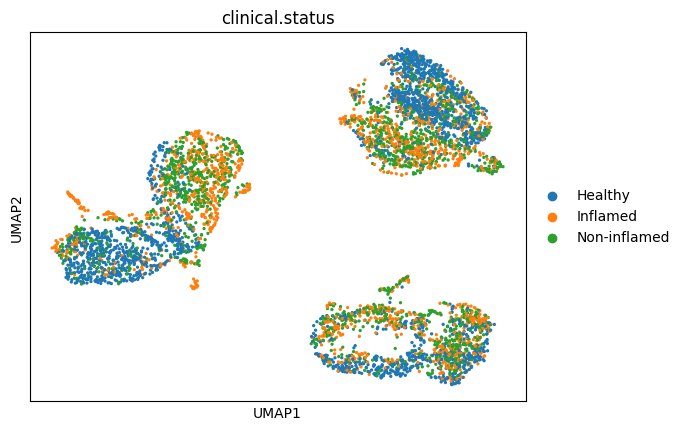

In [4]:
sc.pl.umap(
    adata,
    color=[
        "clinical.status"
    ],
)

In [5]:
adata.obs

,nCount_RNA,nFeature_RNA,cellQ,gender,location,clinical.status,cell.subtypes,pathology,origin,subset
index,,,,,,,,,,
N7.EpiA.AAACGCACAATCGC,2176.911552,269,0.037467,Female,Epi,Non-inflamed,TA2,True,A,A
N7.EpiA.AGATATTGATCGGT,4319.159178,660,0.093293,Female,Epi,Non-inflamed,TA2,True,A,A
N7.EpiA.AGTCTACTTCTCTA,7230.356204,1543,0.242912,Female,Epi,Non-inflamed,TA2,True,A,A
N7.EpiA.ATATACGAAGTACC,5868.425665,1051,0.155489,Female,Epi,Non-inflamed,TA2,True,A,A
N7.EpiA.ATCTGTTGTCATTC,3130.076031,432,0.058324,Female,Epi,Non-inflamed,TA2,True,A,A
...,...,...,...,...,...,...,...,...,...,...
N110.LPB.TCTTCGGTCACGCATA,3346.150450,492,0.198183,Female,LP,Inflamed,CD8+ IELs,True,NA,C
N110.LPB.TTAGGCACAATCCAAC,4341.610208,672,0.268843,Female,LP,Inflamed,CD8+ LP,True,NA,C
N110.LPB.TTGAACGTCGTACGGC,4410.712825,706,0.289367,Female,LP,Inflamed,CD8+ LP,True,NA,C


In [6]:
dl = pt.tl.Dialogue(sample_id = "clinical.status",
                   celltype_key = "cell.subtypes",
                   n_counts_key = "nCount_RNA",
                   n_mpcs = 3)

In [7]:
adata, mcps, ws, ct_subs = dl.calculate_multifactor_PMD(
    adata,
    normalize=True
)

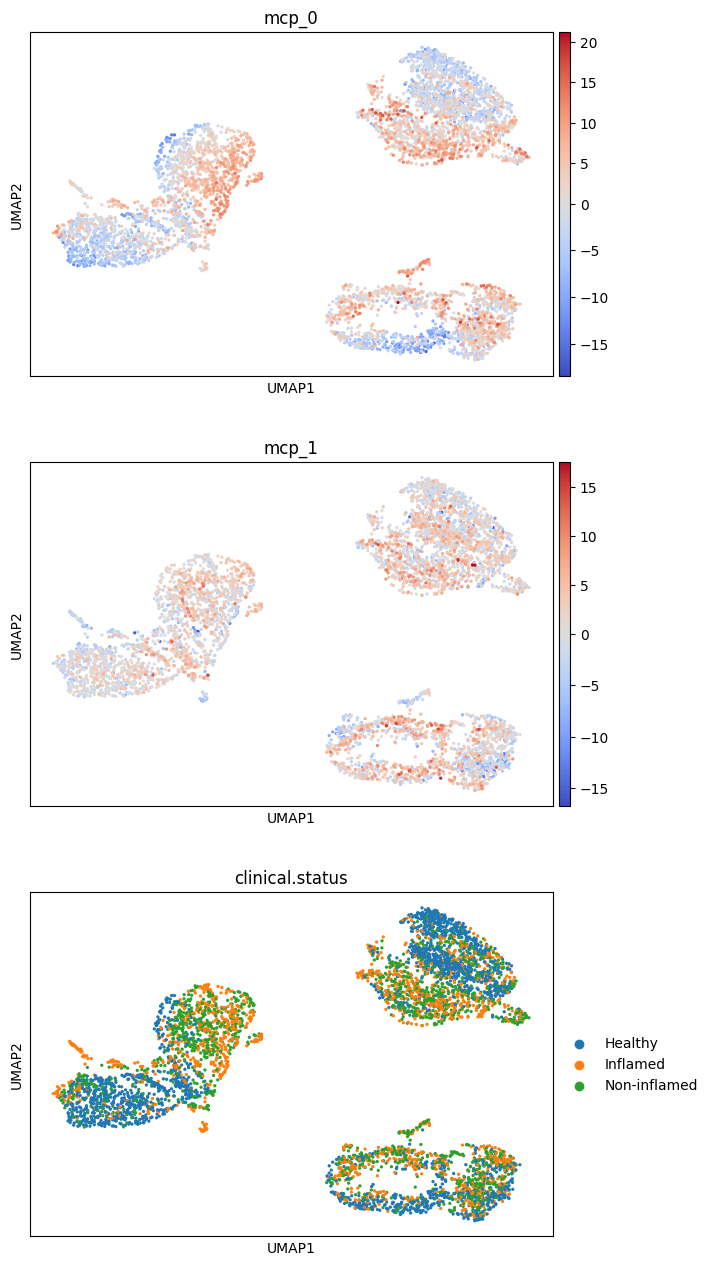

In [8]:
sc.pl.umap(adata, color=['mcp_0', 'mcp_1', 'clinical.status'], ncols=1, cmap='coolwarm', vcenter=0)

In [ ]:
all_results, new_mcps = dl.multilevel_modeling(ct_subs=ct_subs,
                                     mcp_scores=mcps,
                                     ws_dict=ws,
                                     confounder="gender",
                                   )

Output()

3 MCPs identified for CD8+ IELs and CD8+ IL17+.
⠋ CD8+ IELs vs CD8+ IL17+ ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0%

3 MCPs identified for CD8+ IELs and CD8+ LP.
⠸ CD8+ IELs vs CD8+ LP ━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  10%

3 MCPs identified for CD8+ IELs and Macrophages.
⠸ CD8+ IELs vs Macrophages ━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  20%

3 MCPs identified for CD8+ IELs and TA2.
⠦ CD8+ IELs vs TA2 ━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━  30%

3 MCPs identified for CD8+ IL17+ and CD8+ LP.
⠸ CD8+ IL17+ vs CD8+ LP ━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━  40%